In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Function to introduce null values
def introduce_nulls(df, columns, null_fraction):
    for col in columns:
        null_count = int(len(df) * null_fraction)
        null_indices = np.random.choice(df.index, null_count, replace=False)
        df.loc[null_indices, col] = np.nan
    return df

# Function to introduce duplicate rows
def introduce_duplicates(df, duplicate_fraction):
    duplicate_count = int(len(df) * duplicate_fraction)
    duplicate_indices = np.random.choice(df.index, duplicate_count, replace=False)
    duplicates = df.loc[duplicate_indices]
    return pd.concat([df, duplicates], ignore_index=True)

# Function to introduce outliers
def introduce_outliers(df, column, outlier_fraction, multiplier):
    outlier_count = int(len(df) * outlier_fraction)
    outlier_indices = np.random.choice(df.index, outlier_count, replace=False)
    df.loc[outlier_indices, column] += df[column].std() * multiplier * (np.random.rand(outlier_count) + 0.5)
    return df

# Generate synthetic data with more noise and outliers
def generate_noisy_data(n_rows=10000):
    data = {
        "Customer ID": [fake.uuid4() for _ in range(n_rows)],
        "Age": [random.randint(18, 80) for _ in range(n_rows)],
        "Gender": [random.choice(["Male", "Female"]) for _ in range(n_rows)],
        "Marital Status": [random.choice(["Married", "Single", "Divorced"]) for _ in range(n_rows)],
        "Annual Income": [random.randint(20000, 200000) for _ in range(n_rows)],
        "Region": [fake.city() for _ in range(n_rows)],
        "Policy ID": [fake.uuid4() for _ in range(n_rows)],
        "Policy Type": [random.choice(["Auto", "Health", "Home"]) for _ in range(n_rows)],
        "Policy Term": [random.randint(1, 30) for _ in range(n_rows)],
        "Premium Amount": [random.uniform(500, 5000) for _ in range(n_rows)],
        "Coverage Amount": [random.randint(10000, 1000000) for _ in range(n_rows)],
        "Previous Claims Count": [random.randint(0, 10) for _ in range(n_rows)],
        "Policy Age": [random.randint(0, 30) for _ in range(n_rows)],
        "Claim ID": [fake.uuid4() for _ in range(n_rows)],
        "Claim Date": [fake.date_between(start_date="-5y", end_date="today") for _ in range(n_rows)],
        "Claim Amount": [random.uniform(100, 100000) for _ in range(n_rows)],
        "Claim Type": [random.choice(["Medical", "Theft", "Accident"]) for _ in range(n_rows)],
        "Report Delay": [random.randint(0, 365) for _ in range(n_rows)],
        "Claim Status": [random.choice(["Pending", "Approved", "Rejected"]) for _ in range(n_rows)],
        "High-Value Claim": [random.choice([0, 1]) for _ in range(n_rows)],
        "Multiple Claims Indicator": [random.choice([0, 1]) for _ in range(n_rows)],
        "Suspicious Region": [random.choice([0, 1]) for _ in range(n_rows)],
        "Inconsistent Information": [random.choice([0, 1]) for _ in range(n_rows)],
        "Third-Party Involvement": [random.choice([0, 1]) for _ in range(n_rows)],
        "Fraudulent": [1 if random.random() < 0.1 else 0 for _ in range(n_rows)]  # 10% fraudulent, 90% non-fraudulent
    }

    df = pd.DataFrame(data)

    # Introduce null values
    null_columns = ["Age", "Annual Income", "Premium Amount", "Claim Amount"]
    df = introduce_nulls(df, null_columns, null_fraction=0.2)  # Higher null fraction

    # Introduce duplicate rows
    df = introduce_duplicates(df, duplicate_fraction=0.1)  # Higher duplicate fraction

    # Introduce outliers
    outlier_columns = ["Annual Income", "Claim Amount"]
    for col in outlier_columns:
        df = introduce_outliers(df, col, outlier_fraction=0.1, multiplier=5)  # Increased outlier multiplier

    # Perform feature engineering with noise
    df = feature_engineering(df)

    return df

# Generate the dataset
dat = generate_noisy_data(n_rows=10000)


Customer ID: 
Unique identifier for each customer.

Age: 
Age of the policyholder in years.

Annual Income: 
The annual income of the policyholder in monetary units.

Region: 
The geographical region where the policyholder resides.

Policy ID: 
Unique identifier for each insurance policy.

Policy Term: 
Duration of the policy in years.

Premium Amount: 
The amount paid by the policyholder for the insurance coverage.

Coverage Amount: 
The total amount of coverage provided by the policy.

Previous Claims Count: 
Number of claims filed by the policyholder before the current claim.

Policy Age: 
The age of the policy in years since issuance.

Claim ID: 
Unique identifier for each claim.

Claim Date: 
Date when the claim was filed.

Claim Amount: 
The monetary amount requested in the claim.

Report Delay: 
Number of days between the incident and when the claim was reported.

Claim Status: 
Status of the claim (e.g., approved, denied, pending).

High-Value Claim: 
Indicator if the claim amount exceeds a predefined threshold (1 for high-value, 0 otherwise).

Multiple Claims Indicator: 
Indicates whether the policyholder has filed multiple claims (1 for multiple claims, 0 otherwise).

Suspicious Region: 
Flags if the region is deemed suspicious based on historical fraud data (1 for suspicious, 0 otherwise).

Inconsistent Information: 
Flags if there are inconsistencies in the claim information (1 for inconsistent, 0 otherwise).

Third-Party Involvement: 
Indicates if a third party is involved in the claim (1 for involved, 0 otherwise).

Fraudulent: 
Target variable indicating whether the claim is fraudulent (1 for fraudulent, 0 otherwise).

Claim to Premium Ratio: 
Proportion of the claim amount to the premium amount, indicating the relative scale of the claim.

Income to Coverage Ratio: 
Ratio of annual income to coverage amount, reflecting the affordability of the policy for the customer.

High Risk Region: 
Flags regions identified as high-risk areas for claims (1 for high-risk, 0 otherwise).

Gender_Male: 
Indicator for the gender of the policyholder (True for male, False otherwise).

Marital Status_Married: 
Indicator for marital status (True for married, False otherwise).

Marital Status_Single: 
Indicator for marital status (True for single, False otherwise).

Policy Type_Health: 
Indicates if the policy type is health insurance (True for health, False otherwise).

Policy Type_Home: 
Indicates if the policy type is home insurance (True for home, False otherwise).

Claim Type_Medical: 
Indicates if the claim type is for medical reasons (True for medical, False otherwise).

Claim Type_Theft: 
Indicates if the claim type is related to theft (True for theft, False otherwise).

Policy Age Group_Mid: 
Indicator for policies aged between 6 and 15 years (True for mid-aged policies, False otherwise).

Policy Age Group_Old: 
Indicator for policies aged between 16 and 30 years (True for old policies, False otherwise).

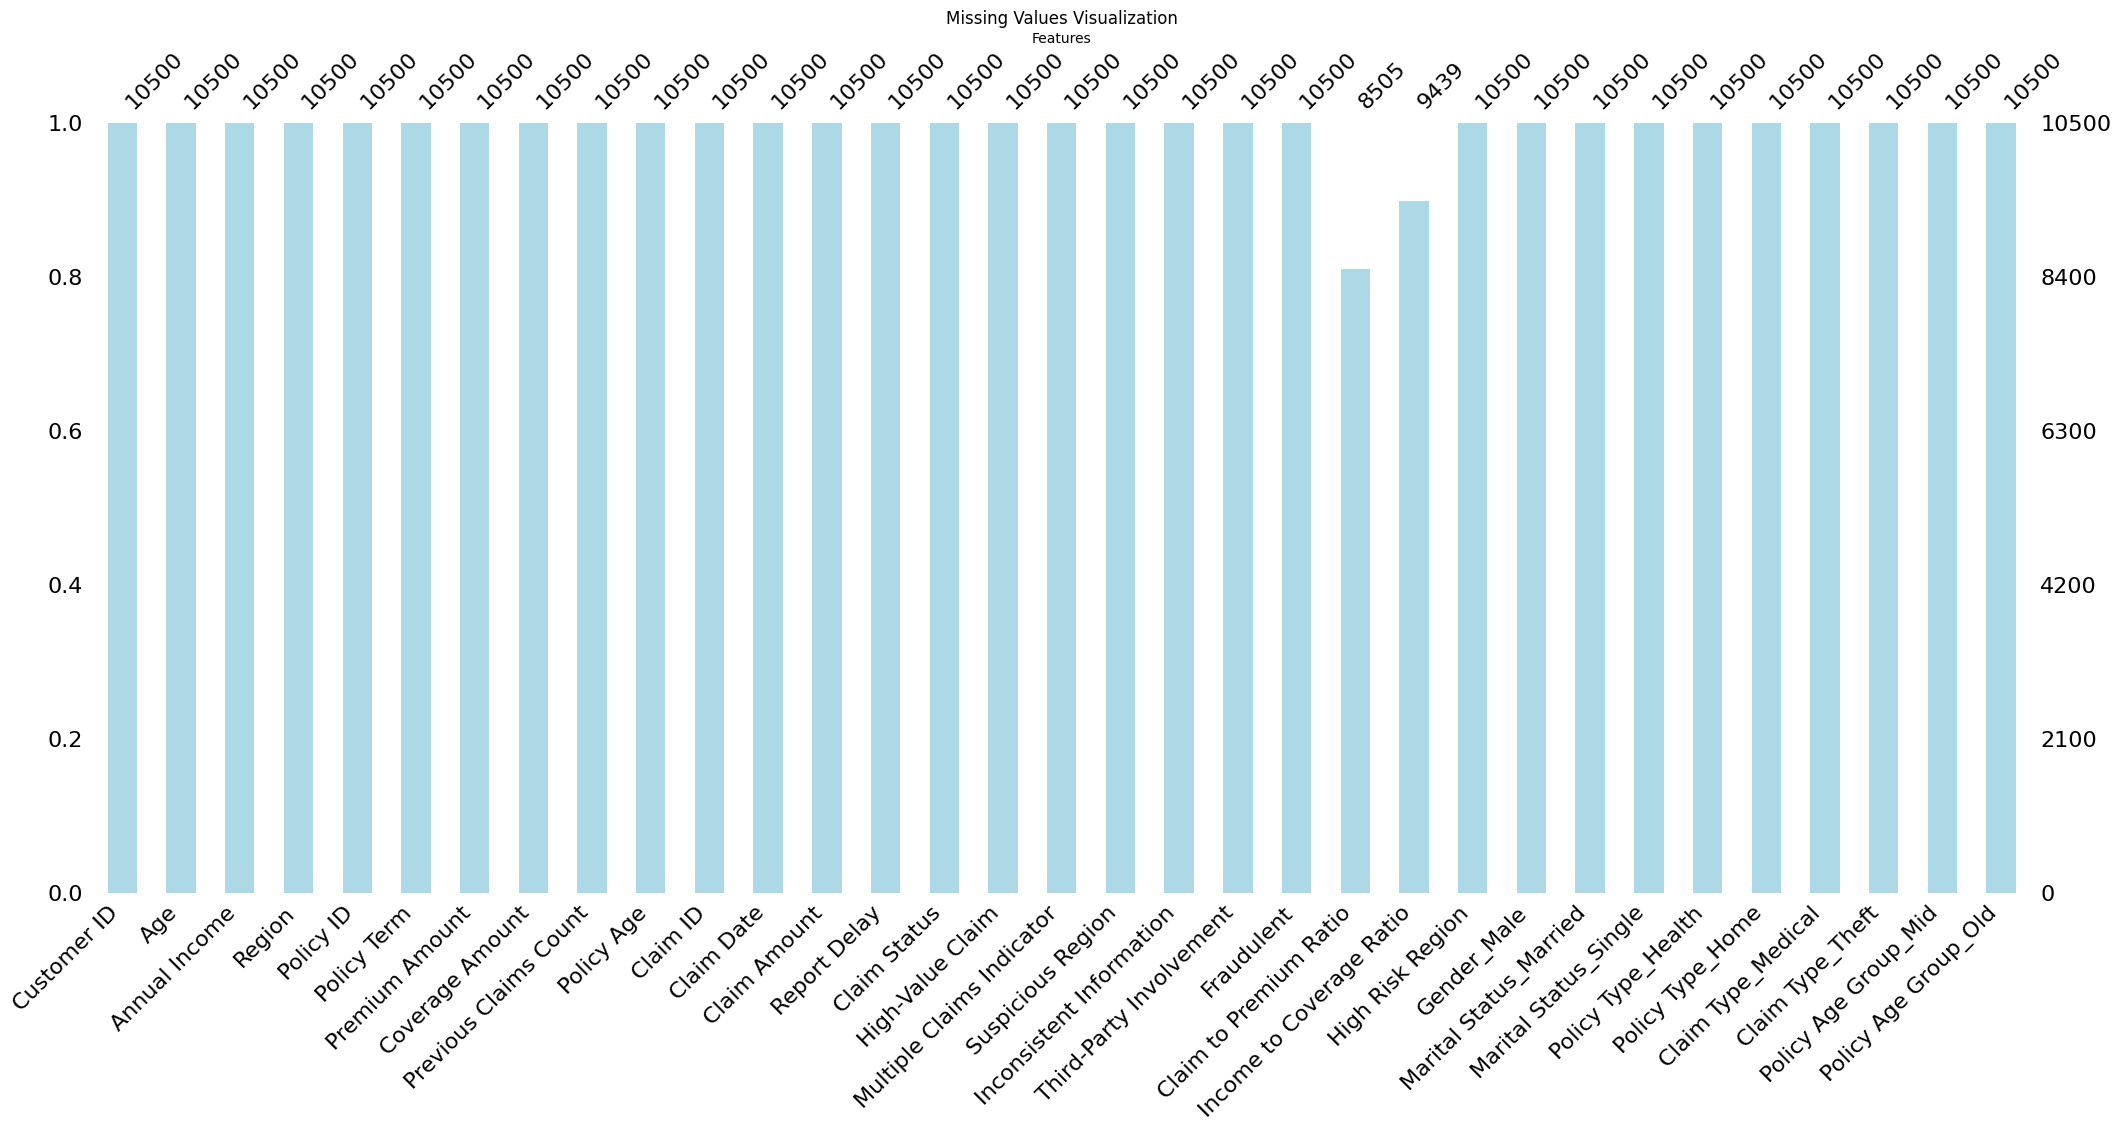

In [55]:
import missingno as msno 
import matplotlib.pyplot as plt
msno.bar(dat, color='lightblue') 
# Customize the plot
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title('Missing Values Visualization')
plt.grid(False)  # Remove grid lines for better readability
plt.show()

In [56]:
dat['Age'].fillna(dat['Age'].mode()[0], inplace=True) 

columns=['Claim to Premium Ratio','Income to Coverage Ratio']
for x in columns:
    dat[x].fillna(dat[x].mean(), inplace=True)

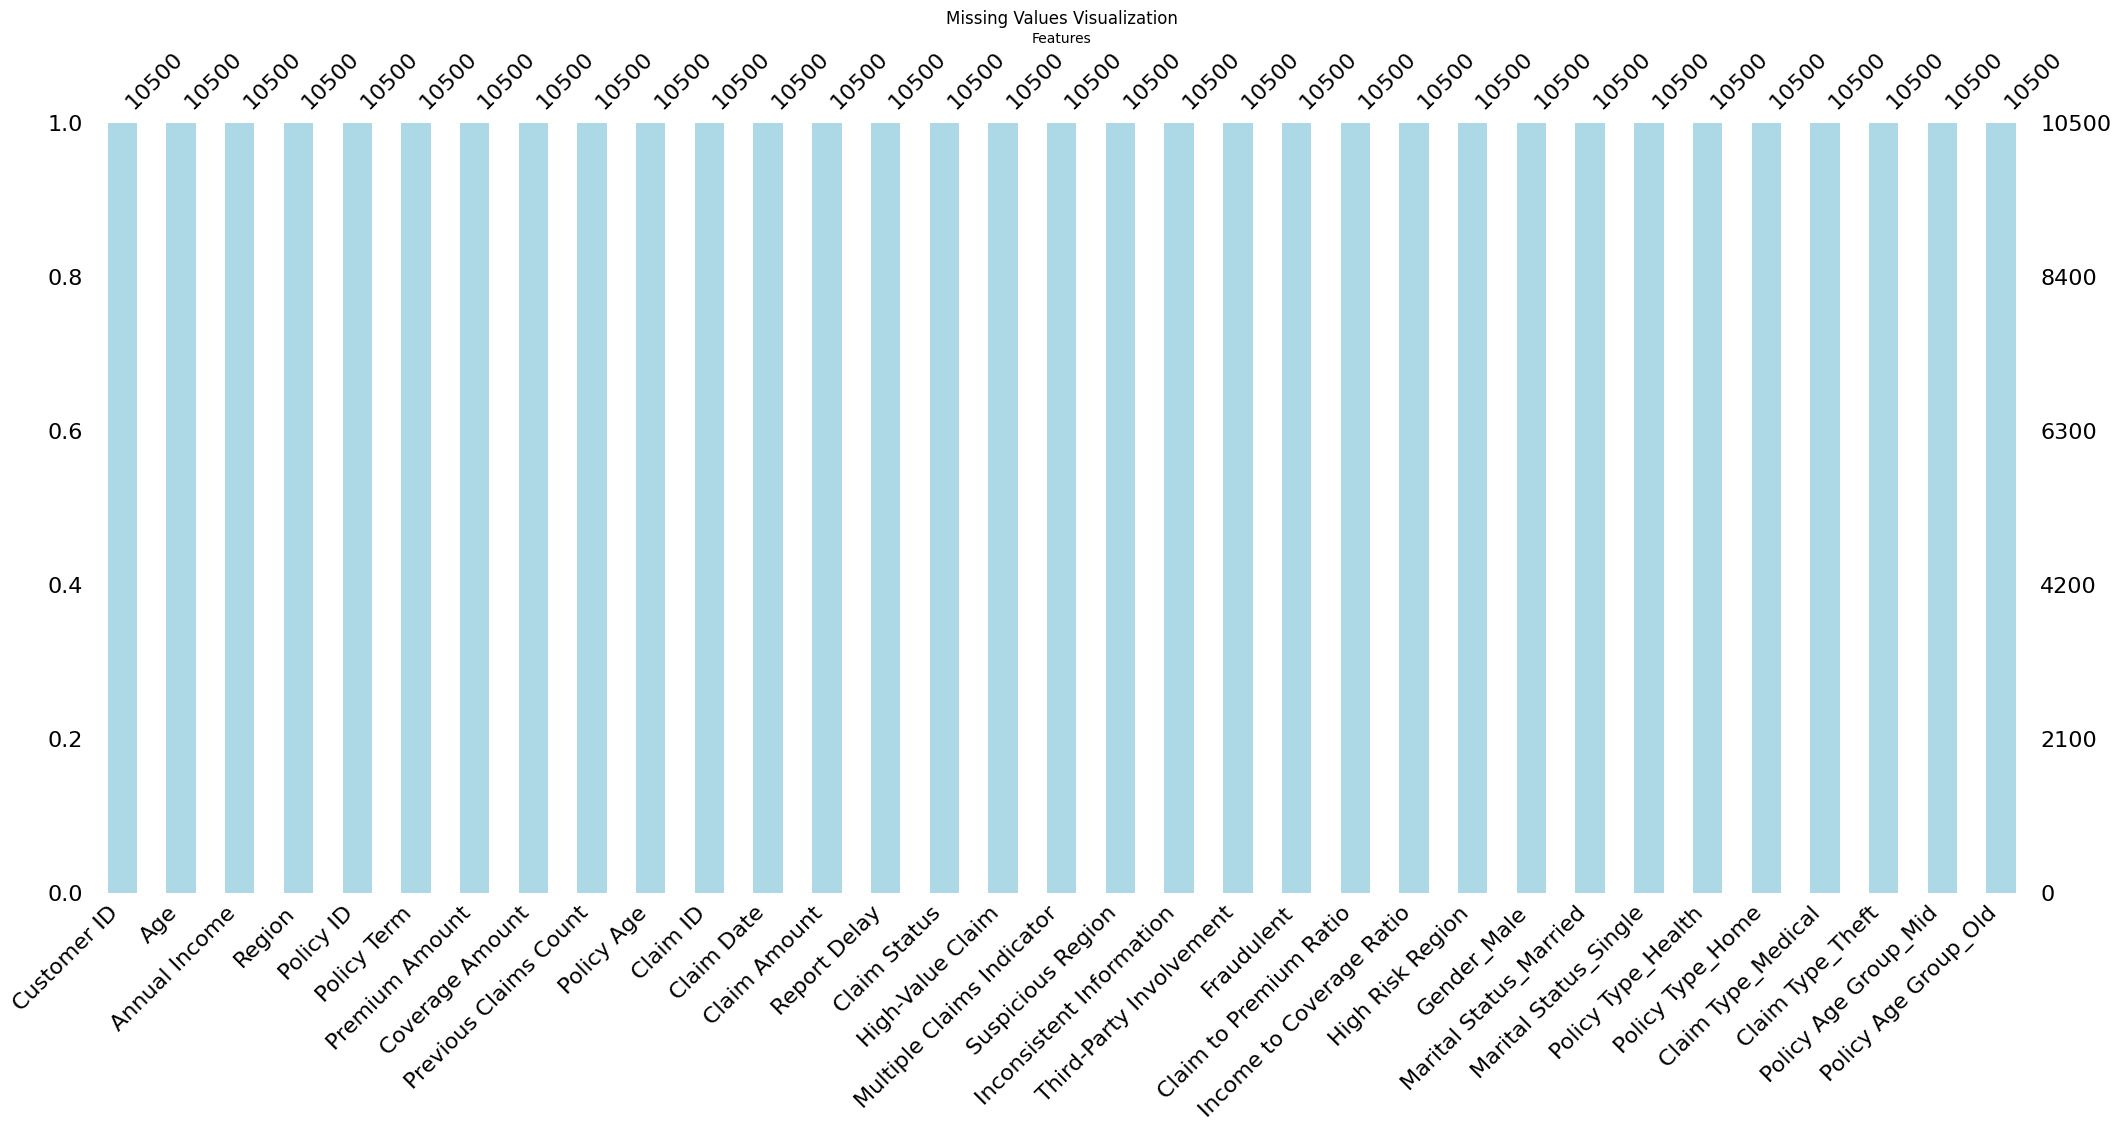

In [57]:
import missingno as msno 
import matplotlib.pyplot as plt
msno.bar(dat, color='lightblue') 
# Customize the plot
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title('Missing Values Visualization')
plt.grid(False)  # Remove grid lines for better readability
plt.show()

In [58]:
# Function for feature engineering
def feature_engineering(df):
    # Create new features
    df['Claim to Premium Ratio'] = df['Claim Amount'] / (df['Premium Amount'] + 1e-6)
    df['Income to Coverage Ratio'] = df['Annual Income'] / (df['Coverage Amount'] + 1e-6)
    df['Policy Age Group'] = pd.cut(df['Policy Age'], bins=[0, 5, 15, 30], labels=['New', 'Mid', 'Old'], include_lowest=True)
    df['High Risk Region'] = df['Region'].apply(lambda x: 1 if x in ['CityA', 'CityB', 'CityC'] else 0)

    return df

dat2 = feature_engineering(dat)

Claim to Premium Ratio: 
Measures the proportionality between the claim amount and the premium paid, indicating whether claims are disproportionately large relative to premiums.

Income to Coverage Ratio: 
Represents the ratio of a policyholder's income to their policy's coverage amount, highlighting the affordability and risk level.

Policy Age Group: 
Categorizes policies into age groups (New, Mid, Old) to identify patterns in claim behavior based on policy duration.

High Risk Region: 
Flags whether a policyholder resides in a region known for higher claim frequencies or fraud risk, based on predefined high-risk areas.

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def label_encode_object_columns(df):
  le = LabelEncoder()
  for col in df.select_dtypes(include=['object','bool','category']).columns:
    df[col] = le.fit_transform(df[col]).astype('int64')
  return df
dat2 = label_encode_object_columns(dat2)
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                10500 non-null  int64  
 1   Age                        10500 non-null  float64
 2   Annual Income              10500 non-null  float64
 3   Region                     10500 non-null  int64  
 4   Policy ID                  10500 non-null  int64  
 5   Policy Term                10500 non-null  int64  
 6   Premium Amount             10500 non-null  float64
 7   Coverage Amount            10500 non-null  int64  
 8   Previous Claims Count      10500 non-null  int64  
 9   Policy Age                 10500 non-null  int64  
 10  Claim ID                   10500 non-null  int64  
 11  Claim Date                 10500 non-null  int64  
 12  Claim Amount               10500 non-null  float64
 13  Report Delay               10500 non-null  int

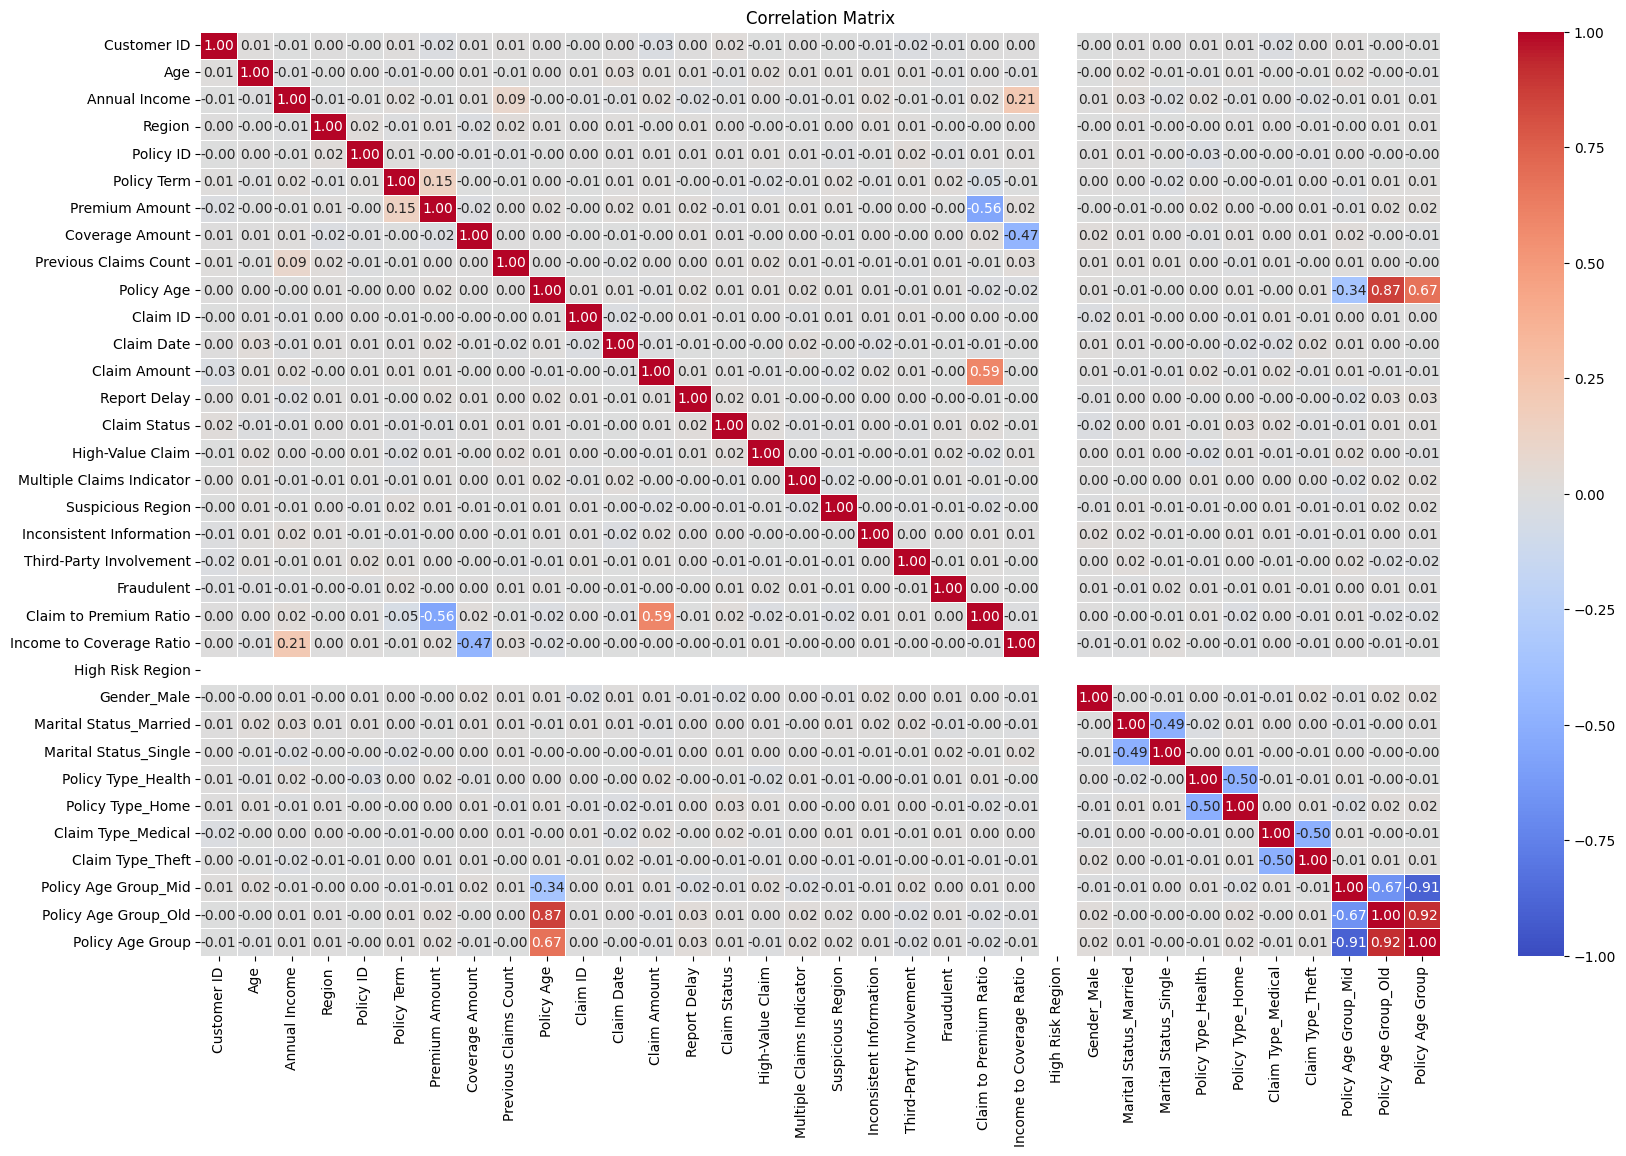

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the correlation matrix
numerical_columns = dat2.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 12))  
sns.heatmap(correlation_matrix, 
            annot=True,        
            fmt=".2f",         
            cmap="coolwarm",   
            vmin=-1, vmax=1,   
            linewidths=0.5)    
plt.title("Correlation Matrix")
plt.show()


In [61]:
# Identify features negatively correlated with the target variable 'Fraudulent'
negatively_correlated_features = correlation_matrix['Fraudulent'][correlation_matrix['Fraudulent'] <0].index.tolist()

# Filter features to drop only those present in the DataFrame
valid_features_to_drop = [feature for feature in negatively_correlated_features if feature in dat.columns]

# Drop the negatively correlated features
dat2 = dat2.drop(valid_features_to_drop, axis=1)

print("Dropped negatively correlated features:", valid_features_to_drop)


Dropped negatively correlated features: ['Customer ID', 'Age', 'Annual Income', 'Region', 'Policy ID', 'Premium Amount', 'Claim ID', 'Claim Date', 'Claim Amount', 'Report Delay', 'Suspicious Region', 'Third-Party Involvement', 'Income to Coverage Ratio', 'Marital Status_Married', 'Policy Type_Home', 'Claim Type_Theft']


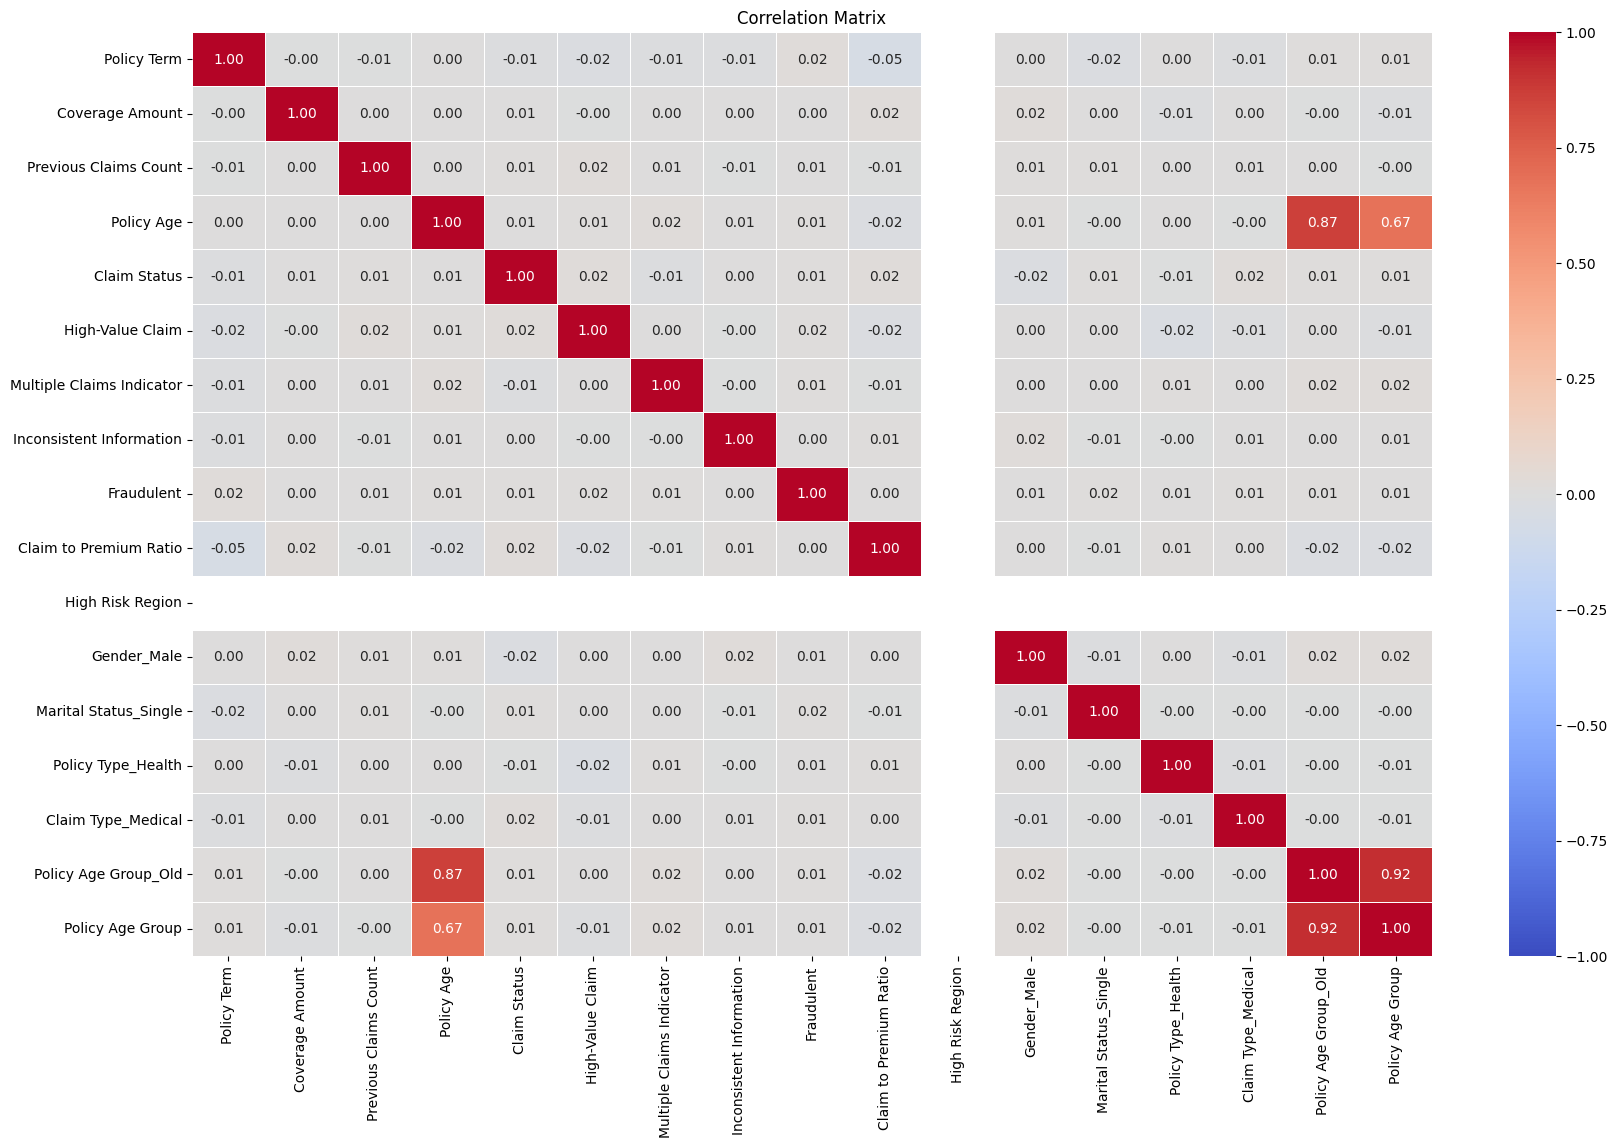

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
dat2=dat2.drop('Policy Age Group_Mid',axis=1)
# Select only numerical columns for the correlation matrix
numerical_columns = dat2.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 12))  
sns.heatmap(correlation_matrix, 
            annot=True,        
            fmt=".2f",         
            cmap="coolwarm",   
            vmin=-1, vmax=1,   
            linewidths=0.5)    
plt.title("Correlation Matrix")
plt.show()


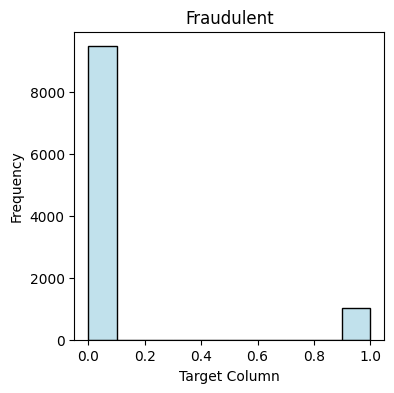

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot using seaborn
plt.figure(figsize=(4, 4))
sns.histplot(dat2['Fraudulent'], bins=10, color='lightblue')  # Adjust bins as needed
plt.title('Fraudulent')
plt.xlabel('Target Column')
plt.ylabel('Frequency')
plt.show()


In [64]:
dat2['Fraudulent'].value_counts()

Fraudulent
0    9483
1    1017
Name: count, dtype: int64

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = dat2.drop('Fraudulent', axis=1)  # Features
y = dat2['Fraudulent']  # Target variable

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


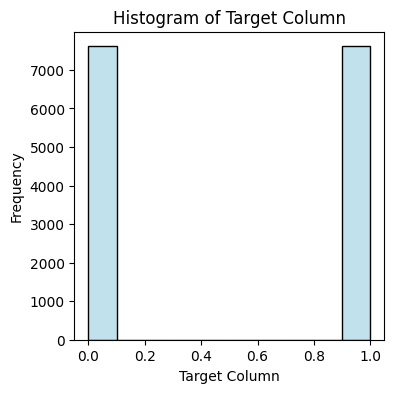

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot using seaborn
plt.figure(figsize=(4, 4))
sns.histplot(y_train, bins=10, color='lightblue')  # Adjust bins as needed
plt.title('Histogram of Target Column')
plt.xlabel('Target Column')
plt.ylabel('Frequency')
plt.show()


In [67]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Policy Term                10500 non-null  int64  
 1   Coverage Amount            10500 non-null  int64  
 2   Previous Claims Count      10500 non-null  int64  
 3   Policy Age                 10500 non-null  int64  
 4   Claim Status               10500 non-null  int64  
 5   High-Value Claim           10500 non-null  int64  
 6   Multiple Claims Indicator  10500 non-null  int64  
 7   Inconsistent Information   10500 non-null  int64  
 8   Fraudulent                 10500 non-null  int64  
 9   Claim to Premium Ratio     10500 non-null  float64
 10  High Risk Region           10500 non-null  int64  
 11  Gender_Male                10500 non-null  int64  
 12  Marital Status_Single      10500 non-null  int64  
 13  Policy Type_Health         10500 non-null  int

In [68]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)  
scaled_df = pd.DataFrame(scaled_data, columns=X_train.columns)  # Match columns dynamically

# Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(scaled_df)
dat2= pd.DataFrame(normalized_data, columns=scaled_df.columns)  # Match columns dynamically

# Check DataFrame info
dat2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15218 entries, 0 to 15217
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Policy Term                15218 non-null  float64
 1   Coverage Amount            15218 non-null  float64
 2   Previous Claims Count      15218 non-null  float64
 3   Policy Age                 15218 non-null  float64
 4   Claim Status               15218 non-null  float64
 5   High-Value Claim           15218 non-null  float64
 6   Multiple Claims Indicator  15218 non-null  float64
 7   Inconsistent Information   15218 non-null  float64
 8   Claim to Premium Ratio     15218 non-null  float64
 9   High Risk Region           15218 non-null  float64
 10  Gender_Male                15218 non-null  float64
 11  Marital Status_Single      15218 non-null  float64
 12  Policy Type_Health         15218 non-null  float64
 13  Claim Type_Medical         15218 non-null  flo

In [70]:
import numpy as np

def introduce_outliers(df, column, outlier_fraction, multiplier):
    outlier_count = int(len(df) * outlier_fraction)
    outlier_indices = np.random.choice(df.index, outlier_count, replace=False)
    df.loc[outlier_indices, column] += df[column].std() * multiplier
    return df

# Apply outliers to multiple columns
outlier_columns = ['Previous Claims Count','Claim Type_Medical' ,"High-Value Claim",'Policy Age Group']
for col in outlier_columns:
    X_train = introduce_outliers(X_train, col, outlier_fraction=0.05, multiplier=3)

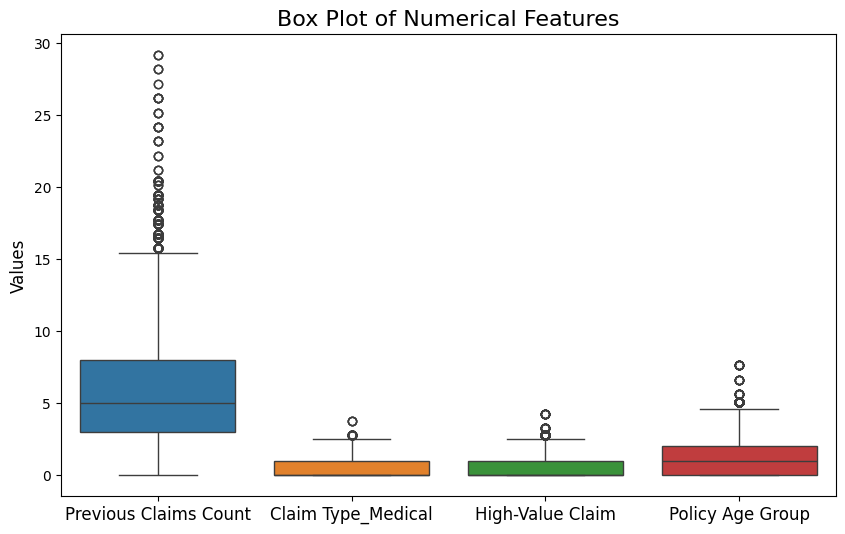

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for numerical features
plt.figure(figsize=(10,6))  # Set the size of the plot
sns.boxplot(data=X_train[['Previous Claims Count','Claim Type_Medical' ,"High-Value Claim",'Policy Age Group']])
plt.title("Box Plot of Numerical Features", fontsize=16)
plt.ylabel("Values", fontsize=12)
plt.xticks(fontsize=12)
plt.show()


In [72]:
import numpy as np

def remove_outliers_zscore(df, threshold=3):
    from scipy.stats import zscore
    
    z_scores = np.abs(zscore(df))
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]

dat2 = remove_outliers_zscore(dat2)

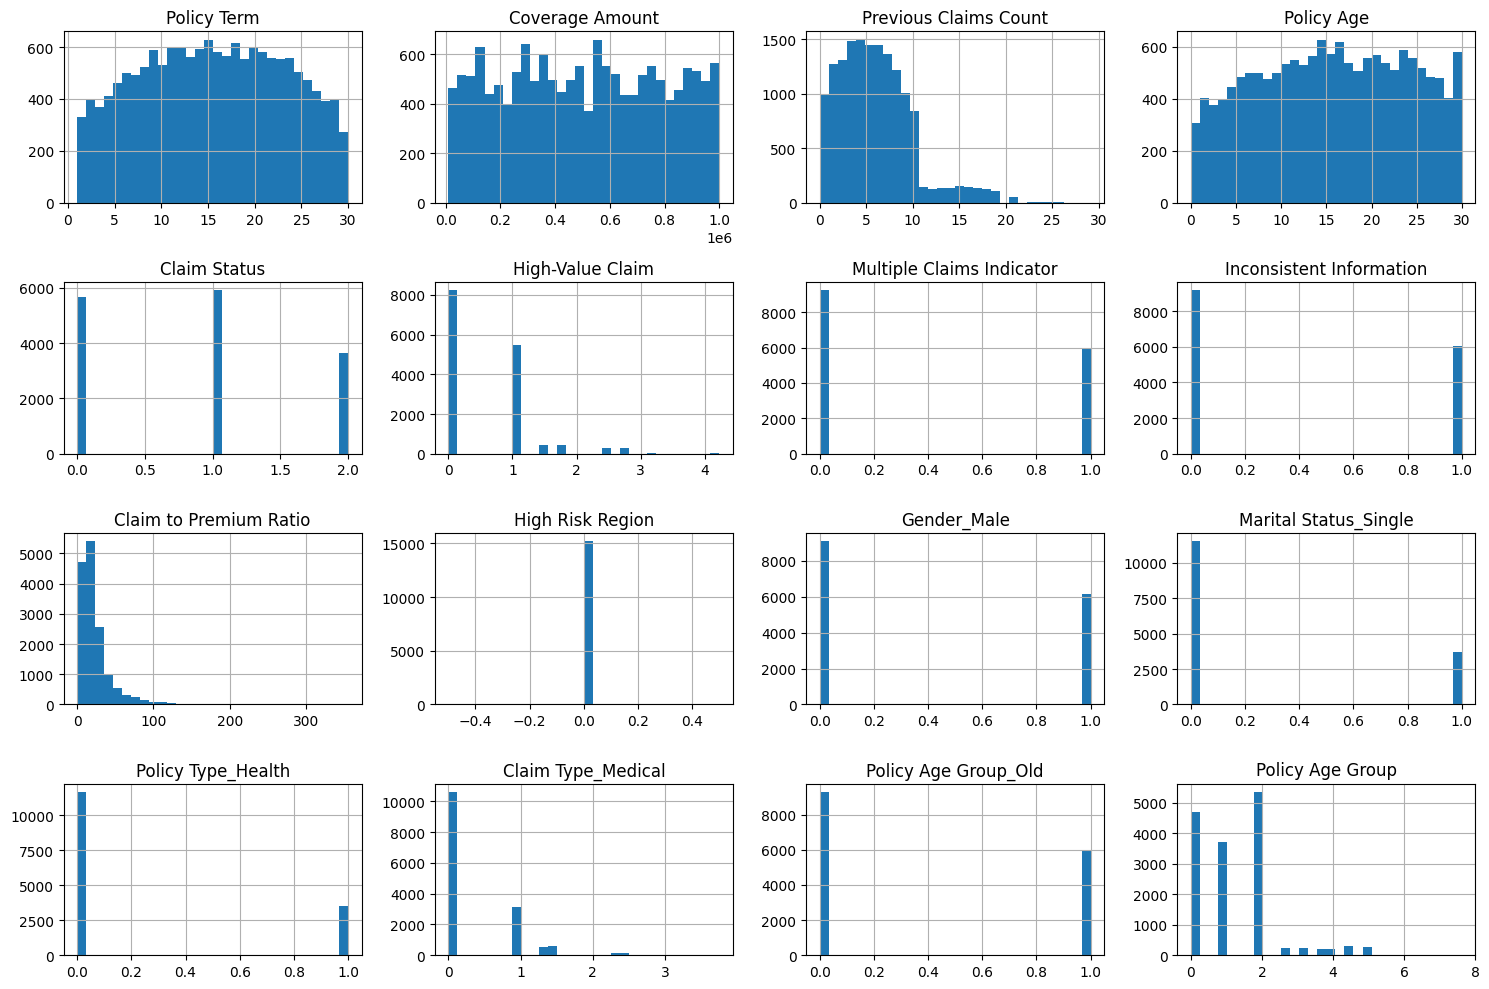

In [73]:
X_train.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

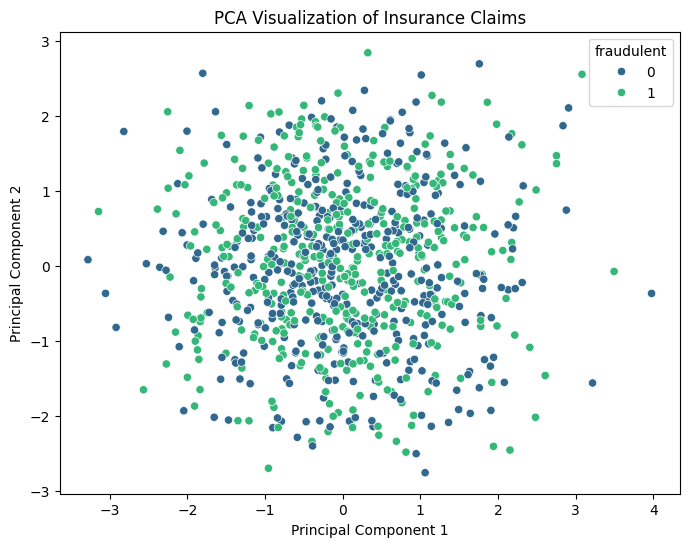

Explained variance ratio: [0.101962   0.09500691 0.09047299 0.08883595]


In [29]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and 'fraudulent' is the target column

# Separate features (X) and target (y)
X = X_train
y = y_train

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=4)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4'])
pca_df['fraudulent'] = y

# Visualize the PCA results using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='fraudulent', data=pca_df, palette='viridis')
plt.title('PCA Visualization of Insurance Claims')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
classification_rep = classification_report(y_train, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Confusion Matrix:
 [[7609    0]
 [   0 7609]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7609
           1       1.00      1.00      1.00      7609

    accuracy                           1.00     15218
   macro avg       1.00      1.00      1.00     15218
weighted avg       1.00      1.00      1.00     15218

